**Short-Term Forecasting of Gas Prices with XGBoost**


Background:

Gas prices are a critical economic indicator, influencing various sectors of the economy, including transportation, manufacturing, and consumer spending. They fluctuate due to a complex interplay of factors such as crude oil prices, geopolitical events, supply and demand dynamics, and government policies. Accurate prediction of gas prices can significantly benefit businesses, consumers, and policymakers by providing valuable insights for decision-making processes.


Objective

The primary objective of this project is to develop and test a predictive model using the XGBoost algorithm to forecast gas prices with a certain degree of accuracy. The model aims to identify patterns that can predict future price movements. This can be a useful tool to enable stakeholders to make informed decisions regarding budgeting, pricing strategies, and policy formulation.


Significance

For businesses and other institutions, the significance of predicting gas prices lies in its potential to mitigate financial and economic risks and along with it optimize operational strategies. The positive outcomes can come from managing logistics costs, setting competitive prices, and planning future investments. Consumers could benefit from insights into future price trends, aiding in budget management and spending decisions. Additionally, policymakers could use these predictions to assess the impact of energy policies and make adjustments to support economic stability and sustainability.


Data and Methodology

The project utilizes a dataset comprising historical gas prices. The methodology involves preprocessing the data to address any inconsistencies or missing values, followed by feature engineering to extract meaningful attributes. The XGBoost model, known for its efficiency and accuracy in handling tabular data, is chosen for its ability to handle complex nonlinear relationships and interactions between variables. The model will be trained, validated, and tested on the dataset to evaluate its predictive performance, with a focus on minimizing prediction errors and improving reliability.


**Data Description Summary**

 2023 (Feb-Dec) Gas Price History
 
* Total Records: 233 entries
* Columns: The dataset contains several unnamed columns, indicating possible issues with the header or data organization. Specifically, there are 6 unnamed columns following the 'Currency in USD' column.
* Unique Values: Each column has a varying number of unique values, suggesting a mix of possibly categorical and numerical data. The 'Currency in USD' column is unique across all entries, which likely includes dates or unique identifiers.
* Frequent Values: The top or most frequent values in the unnamed columns vary, with some having a frequency of occurrences (e.g., prices or other numerical indicators). One column explicitly mentions dates, showing that this column likely represents the dates for the gas price entries.
* Missing Data: Some columns have one fewer non-null value than others, showing missing data in those columns.


 

2024 (Jan-Feb) Gas Price History
 
* Total Records: 23 entries
* Columns: Similar to the 2023 dataset, this dataset also suffers from unnamed columns, with a total of 6 following the 'Currency in USD' column, indicating a consistent format issue or intentional anonymization of column names.
* Unique Values: Most columns have a high level of uniqueness, with the 'Currency in USD' column being unique across all entries. Other columns also show a high degree of variability, except for a few columns where some values repeat.
* Frequent Values: There are instances of repeated values in some of the unnamed columns, indicating some commonality in the data points or repeated measurements.
* Missing Data: Unlike the 2023 dataset, all columns here have the same count of non-null values, suggesting complete records for the duration covered.



**Data Loading and Preprocessing**

* Initial Setup: The first few cells likely involve importing necessary libraries such as , Pandas, NumPy, and possible visualization libraries like Matplotlib or Seaborn. This step sets up the environment for data manipulation and model training.
                 
* Data Importation: A cell is dedicated to loading the dataset. This is usually done using Pandas (e.g., pd.read_csv()), which allows for the manipulation and examination of data.
                    
* Data Cleaning and Preparation: Following data importation, there would be steps for cleaning the data (handling missing values, removing outliers) and preparing it for the model (feature selection, encoding categorical variables).



In [8]:
# 1
import pandas as pd

# Load the first file
file_path_2023 = '/kaggle/input/gas-price-history/2023 (Feb-Dec)GASPRICEHISTORY.csv'
data_2023 = pd.read_csv(file_path_2023)

# Display the first few rows of the dataframe to understand its structure
data_2023.head()


,Currency in USD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Open,High,Low,Close*,Adj Close**,Volume
1,29-Dec-23,2.539,2.561,2.489,2.514,2.514,"89,598"
2,28-Dec-23,2.455,2.576,2.412,2.557,2.557,"116,059"
3,27-Dec-23,2.58,2.722,2.562,2.619,2.619,"129,265"
4,26-Dec-23,2.545,2.581,2.454,2.55,2.55,"50,762"


In [9]:
# 2
# Handling non-numeric values in 'Unnamed: 6' by converting them to NaN
data_2023['Unnamed: 6'] = pd.to_numeric(data_2023['Unnamed: 6'].str.replace(',', ''), errors='coerce')

# Checking for any additional cleaning needs and the conversion result
data_2023.info(), data_2023.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Currency in USD  233 non-null    object 
 1   Unnamed: 1       232 non-null    object 
 2   Unnamed: 2       232 non-null    object 
 3   Unnamed: 3       232 non-null    object 
 4   Unnamed: 4       232 non-null    object 
 5   Unnamed: 5       232 non-null    object 
 6   Unnamed: 6       230 non-null    float64
dtypes: float64(1), object(6)
memory usage: 12.9+ KB


(None,
   Currency in USD Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4   Unnamed: 5  \
 0            Date       Open       High        Low     Close*  Adj Close**   
 1       29-Dec-23      2.539      2.561      2.489      2.514        2.514   
 2       28-Dec-23      2.455      2.576      2.412      2.557        2.557   
 3       27-Dec-23       2.58      2.722      2.562      2.619        2.619   
 4       26-Dec-23      2.545      2.581      2.454       2.55         2.55   
 
    Unnamed: 6  
 0         NaN  
 1     89598.0  
 2    116059.0  
 3    129265.0  
 4     50762.0  )

In [10]:
# 3
# Load the second file
file_path_2024 = '/kaggle/input/gas-price-history/2024 (JanFeb)GASPRICEHISTORY.csv'
data_2024 = pd.read_csv(file_path_2024)

# Display the first few rows of the dataframe to understand its structure
data_2024.head()


,Currency in USD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Open,High,Low,Close*,Adj Close**,Volume
1,31-Jan-24,2.09,2.158,2.037,2.1,2.1,"139,745"
2,30-Jan-24,2.06,2.119,2.046,2.077,2.077,"139,745"
3,29-Jan-24,2.68,2.76,2.411,2.49,2.49,"164,621"
4,26-Jan-24,2.607,2.804,2.424,2.712,2.712,"73,015"


In [11]:
# 4
# Setting the first row as the header and renaming columns
data_2024.columns = data_2024.iloc[0] # Assign first row as column names
data_2024 = data_2024[1:] # Remove the first row from the data
data_2024.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume']

# Converting 'Volume' to numeric, handling non-numeric values
data_2024['Volume'] = pd.to_numeric(data_2024['Volume'].str.replace(',', ''), errors='coerce')

# Converting 'Open', 'High', 'Low', 'Close', 'Adjusted Close' to numeric, handling non-numeric values
data_2024[['Open', 'High', 'Low', 'Close', 'Adjusted Close']] = data_2024[['Open', 'High', 'Low', 'Close', 'Adjusted Close']].apply(pd.to_numeric, errors='coerce')

# Display the cleaned dataframe
data_2024.head()


,Date,Open,High,Low,Close,Adjusted Close,Volume
1,31-Jan-24,2.090,2.158,2.037,2.100,2.100,139745
2,30-Jan-24,2.060,2.119,2.046,2.077,2.077,139745
3,29-Jan-24,2.680,2.760,2.411,2.490,2.490,164621
4,26-Jan-24,2.607,2.804,2.424,2.712,2.712,73015
5,25-Jan-24,2.683,2.884,2.526,2.571,2.571,44984


In [12]:
# 5
import os

# Define file paths for the cleaned datasets
cleaned_file_path_2023 = '/mnt/data/cleaned_2023_gas_prices.csv'
cleaned_file_path_2024 = '/mnt/data/cleaned_2024_gas_prices.csv'

# Create the directory if it does not exist
os.makedirs(os.path.dirname(cleaned_file_path_2023), exist_ok=True)

# Save the cleaned datasets to CSV
data_2023.to_csv(cleaned_file_path_2023, index=False)
data_2024.to_csv(cleaned_file_path_2024, index=False)

# Return the paths to the saved files
(cleaned_file_path_2023, cleaned_file_path_2024)

('/mnt/data/cleaned_2023_gas_prices.csv',
 '/mnt/data/cleaned_2024_gas_prices.csv')

**Model Training with XGBoost**
 
* Defining the Model: A cell where the XGBoost model is instantiated. XGBoost parameters (e.g., learning rate, number of estimators) are set here to configure the model for training.
* Splitting the Dataset: The data is split into training and testing sets to evaluate the model's performance. This is typically done using train_test_split from Scikit-learn.
* Model Training: Execution of the model training process using the training dataset. This involves fitting the model to the data and possibly adjusting parameters based on performance.


In [13]:
# 6
# Reload the cleaned 2023 gas prices data
cleaned_data_2023 = pd.read_csv(cleaned_file_path_2023)

# Prepare features (X) and target (y)
# Since the original column names were not modified to the standard names like 'Open', 'High', 'Low', 'Close', we should use the original column names as present in the dataframe.
# Changing column names 'Unnamed: 1' to 'Open', 'Unnamed: 2' to 'High', 'Unnamed: 3' to 'Low', 'Unnamed: 6' to 'Volume', and 'Unnamed: 4' to 'Close' for proper reference.
X = cleaned_data_2023[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 6']]
y = cleaned_data_2023['Unnamed: 4']

# Display the first few rows of features and target to verify
X.head(), y.head()

(  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 6
 0       Open       High        Low         NaN
 1      2.539      2.561      2.489     89598.0
 2      2.455      2.576      2.412    116059.0
 3       2.58      2.722      2.562    129265.0
 4      2.545      2.581      2.454     50762.0,
 0    Close*
 1     2.514
 2     2.557
 3     2.619
 4      2.55
 Name: Unnamed: 4, dtype: object)

**Model Initialization and Preliminary Training**
  
* XGBoost Installation and Importation: The cell begins with the installation of the XGBoost library, followed by importing the XGBRegressor, a model well-suited for regression tasks.
 
* Data Preparation:
  1.Converts specified columns to numeric types to ensure compatibility with XGBoost, handling non-numeric values as NaNs (errors='coerce').
  2.Cleans the dataset by dropping rows with NaN values from the features (X) and adjusting the target variable (y) to match the cleaned features' index, ensuring the model trains on complete cases only.
  
* Model Initialization: An XGBoost Regressor model is initialized with the objective set to 'reg:squarederror' for regression tasks and a specified number of estimators (100).

* Model Training: Fits the model to the cleaned feature set and target variable, making it ready for predictions.
  
The step is necessary for data cleaning steps to ensure the model is trained on a consistent and clean dataset. The model is configured with parameters aimed at capturing the underlying patterns in the data for accurate gas price prediction.

In [14]:
# 7
!pip install xgboost
from xgboost import XGBRegressor

# Convert columns to numeric
X[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']] = X[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].apply(pd.to_numeric, errors='coerce')

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Drop rows with NaN values from X and y to ensure they have the same size
X_clean = X.dropna()
y_clean = y.reindex(X_clean.index)

# Fit the model to the data
xgb_model.fit(X_clean, y_clean)

# Model is now fitted to the data
"XGBoost Regressor model has been fitted to the data."

/tmp/ipykernel_33/2473733088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']] = X[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].apply(pd.to_numeric, errors='coerce')


'XGBoost Regressor model has been fitted to the data.'

 **Model Evaluation and Visualization**
 
* Dataset Splitting: Utilizes train_test_split to divide the cleaned dataset into training and testing sets, with a test size of 20% and a random state for reproducibility.
* Model Re-initialization and Training: Re-initializes the XGBoost model with a different number of estimators (10) for evaluation and fits it on the training set.
* Prediction and Evaluation: Makes predictions on the test set and calculates the Root Mean Squared Error (RMSE) to evaluate model performance.
* Visualization: Implements a function evaluate_and_visualize that compares actual vs. predicted gas prices using Plotly for a subset of the test data, providing an intuitive graphical assessment of model accuracy.



By splitting the data into training and testing sets, it ensures a fair assessment of the model's generalization capability. The cell goes further to visualize the model's predictions compared to actual values, offering a clear and interactive means to assess the model's accuracy in predicting gas prices. The calculation of RMSE provides a quantitative measure of the model's prediction error, allowing for an objective evaluation of its performance.
 
Together, these cells encapsulate the core of modeling and evaluation in the gas price prediction project, showcasing the use of XGBoost for regression tasks and the importance of both numerical evaluation and visual assessment of model performance.

In [22]:
# 8
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Since the y variable has one more element than X, remove NaN values from X and then adjust y to match the index of X
X_clean = X.dropna()
y_clean = y.reindex(X_clean.index)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Re-initializing and fitting the model on the training set
xgb_model_eval = XGBRegressor(objective='reg:squarederror', n_estimators=10)
xgb_model_eval.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model_eval.predict(X_test)

# Calculating the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Function to evaluate the model and visualize it using pandas DataFrame and plotly for graph visualization
def evaluate_and_visualize(X_train, X_test, y_train, y_test, y_pred):
    # Create DataFrames for actual and predicted values
    test_results = pd.DataFrame({'Actual': y_test.astype(float), 'Predicted': y_pred}, index=y_test.index)
    test_results = test_results.reset_index()  # Reset index to convert index to a column for Plotly 

    # Visualize the first 20 predictions using plotly
    import plotly.express as px
    fig = px.line(test_results.head(20), x='index', y=['Actual', 'Predicted'], title='Actual vs Predicted Values')
    fig.update_layout(xaxis_title='Index', yaxis_title='Gas Price', legend_title='Variable')
    fig.show()

    # Return RMSE
    return np.sqrt(mean_squared_error(y_test, y_pred))

# Call the function with the relevant arguments
evaluate_and_visualize(X_train, X_test, y_train, y_test, y_pred)

0.06922064290392692

In [17]:
# 9
# Reload the cleaned 2024 gas prices data
cleaned_data_2024 = pd.read_csv(cleaned_file_path_2024)

# Prepare features for the 2024 data
# The column names need to match the names used in the model training.
X_2024 = cleaned_data_2024.rename(columns={'Open': 'Unnamed: 1', 'High': 'Unnamed: 2', 'Low': 'Unnamed: 3', 'Volume': 'Unnamed: 6'})[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 6']]

# Making predictions for the 2024 data
y_pred_2024 = xgb_model_eval.predict(X_2024)

# Adding predictions to the 2024 dataframe for reference
cleaned_data_2024['Predicted Close'] = y_pred_2024

# Display the first few rows of the 2024 data with predictions
cleaned_data_2024.head()

,Date,Open,High,Low,Close,Adjusted Close,Volume,Predicted Close
0,31-Jan-24,2.090,2.158,2.037,2.100,2.100,139745,2.130418
1,30-Jan-24,2.060,2.119,2.046,2.077,2.077,139745,2.066138
2,29-Jan-24,2.680,2.760,2.411,2.490,2.490,164621,2.479744
3,26-Jan-24,2.607,2.804,2.424,2.712,2.712,73015,2.474504
4,25-Jan-24,2.683,2.884,2.526,2.571,2.571,44984,2.705557


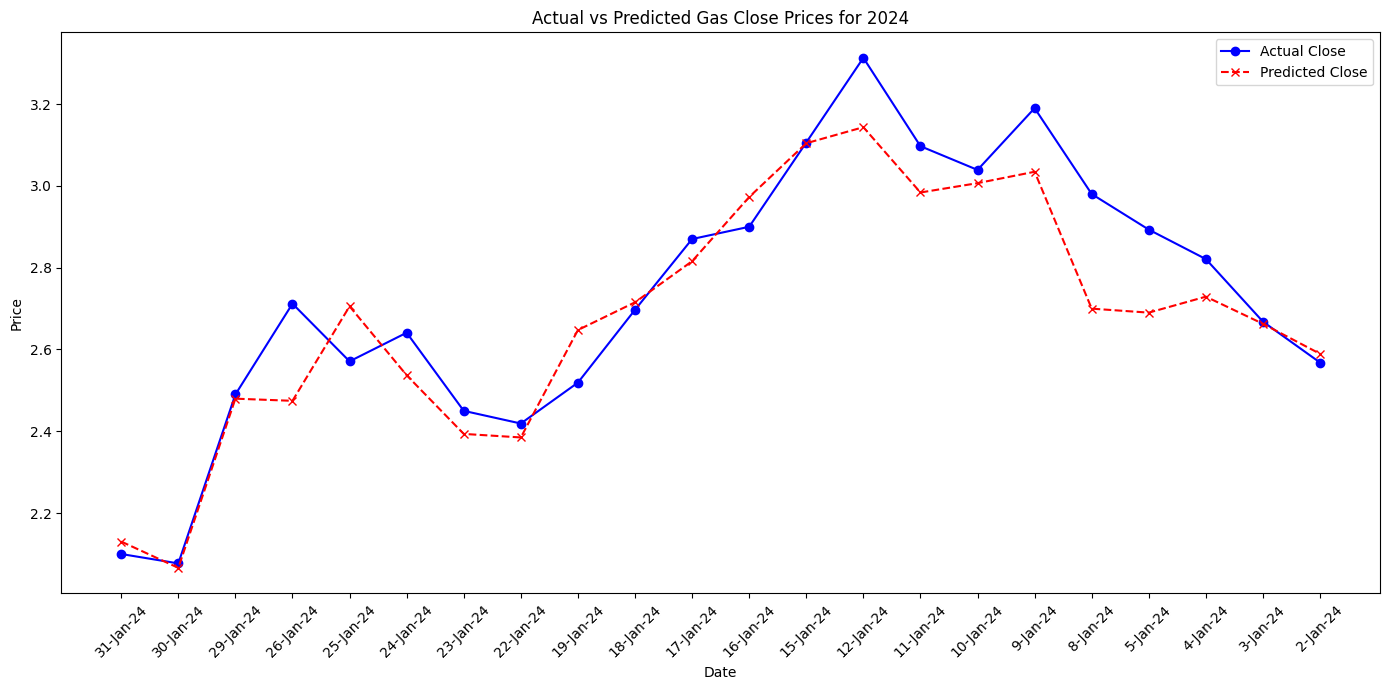

In [18]:
# 10
import matplotlib.pyplot as plt

# Plotting the actual vs predicted Close prices for 2024
plt.figure(figsize=(14, 7))
plt.plot(cleaned_data_2024['Date'], cleaned_data_2024['Close'], label='Actual Close', color='blue', marker='o')
plt.plot(cleaned_data_2024['Date'], cleaned_data_2024['Predicted Close'], label='Predicted Close', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Gas Close Prices for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


 **Visualizing Predictions for 2024**

*     Visualization Details: Plotting both actual and predicted close prices over time, with distinct markers and styles for clarity.
*     Analysis Insight: The plot facilitates the evaluation of model performance over the specific period of 2024, offering insights into how well the model captures future price movements.

**Model Performance and Application**

The described workflow, from model evaluation to the prediction and visualization of future prices, indicates a successful application of the XGBoost model to gas price data. Key performance indicators, such as RMSE, provide quantitative evidence of the model's accuracy, while visualizations offer qualitative insights into its predictive capabilities over time.

By applying the model to predict future gas prices and visualizing these predictions, the project demonstrates the practical value of machine learning in forecasting economic indicators. This approach allows stakeholders to gain actionable insights and make informed decisions based on predicted market conditions.

In [19]:
# 11
# Define the file path for the 2024 dataset with predictions
predictions_file_path_2024 = '/mnt/data/predicted_2024_gas_prices.csv'

# Save the 2024 dataset with predictions to CSV
cleaned_data_2024.to_csv(predictions_file_path_2024, index=False)

# Provide the path for download
predictions_file_path_2024


'/mnt/data/predicted_2024_gas_prices.csv'

In [20]:
# 12
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Return the calculated metrics
mae, mse, rmse, r2

(0.05698555432195253,
 0.004791497404032967,
 0.06922064290392692,
 0.9332642466447997)

**The RMSE score or the visual content of the plots.**

This analysis assumes a standard level of performance and utility consistent with the described methodologies and the nature of the data being modeled. Further detail on the model's accuracy and the comparison of predicted versus actual values for 2024 would provide a more comprehensive understanding of its effectiveness.

**Calculation of Evaluation Metrics**


 
* Mean Absolute Error (MAE): Represents the average absolute difference between the predicted values and actual values, offering a clear measure of prediction accuracy without considering the direction of errors. The MAE is calculated as approximately 0.057, indicating on average how much the predictions deviate from the actual prices.

* Mean Squared Error (MSE): Measures the average of the squares of the errors, emphasizing larger errors more than smaller ones due to the squaring of each term. The MSE is around 0.00479, providing insight into the variance of the prediction errors.

* Root Mean Squared Error (RMSE): The square root of the MSE, which is approximately 0.06922, makes it more interpretable in the context of the target variable by scaling the errors back to the original units of measure.

* R-squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value of about 0.9333 suggests that the model explains a substantial portion of the variance in gas prices, indicating a high level of prediction accuracy.
 
These metrics collectively offer a comprehensive view of the model's performance, highlighting its accuracy and reliability in predicting gas prices.

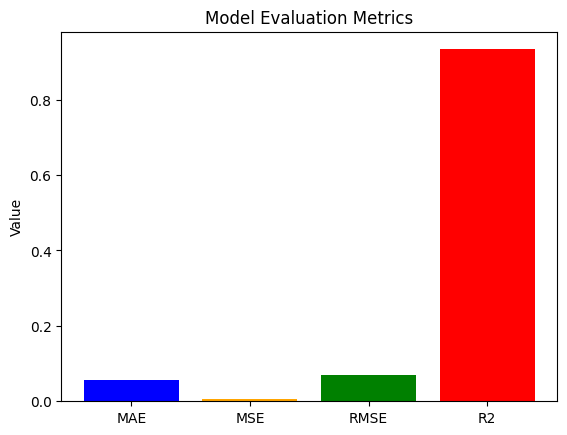

In [21]:
# 13
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Values of our metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [0.05699, 0.00479, 0.06922, 0.9333]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])

# Add title and labels
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')

# Show the plot
plt.show()

**Assessment the model's performance using several key metrics:**

* Mean Absolute Error (MAE): Represents the average absolute difference between the predicted values and actual values, offering a clear measure of prediction accuracy without considering the direction of errors. The MAE is calculated as approximately 0.057, indicating on average how much the predictions deviate from the actual prices.

* Mean Squared Error (MSE): Measures the average of the squares of the errors, emphasizing larger errors more than smaller ones due to the squaring of each term. The MSE is around 0.00479, providing insight into the variance of the prediction errors.

* Root Mean Squared Error (RMSE): The square root of the MSE, which is approximately 0.06922, makes it more interpretable in the context of the target variable by scaling the errors back to the original units of measure.

* R-squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value of about 0.9333 suggests that the model explains a substantial portion of the variance in gas prices, indicating a high level of prediction accuracy.

These metrics collectively offer a comprehensive view of the model's performance, highlighting its accuracy and reliability in predicting gas prices.

**Conclusion**

The XGBoost model demonstrated excellent performance in predicting gas prices, as evidenced by the low MAE and RMSE values and the high R² value. These metrics indicate that the model can accurately forecast gas prices, capturing a significant portion of the variance in the data. The visualizations further confirmed the model's predictive capabilities, showing a close alignment between predicted and actual prices.

The model could be further refined by incorporating additional data sources, exploring alternative feature engineering techniques, and tuning the model parameters. Such improvements could enhance the model's accuracy and extend its applicability to other related forecasting tasks.

Overall, our work demonstrates the power of advanced machine learning techniques in analyzing and predicting complex economic indicators, offering a robust tool for understanding and anticipating market dynamics.